- In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.  
  

- You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 players per group.  

- File descriptions
data.csv - 151MB  

__Data fields__
  
  DBNOs - Number of enemy players knocked.  

assists - Number of enemy players this player damaged that were killed by teammates.  

boosts - Number of boost items used.  

damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.  

headshotKills - Number of enemy players killed with headshots.  

heals - Number of healing items used.  

Id - Player’s Id  

killPlace - Ranking in match of number of enemy players killed.  

killPoints - Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.  

killStreaks - Max number of enemy players killed in a short amount of time.  

kills - Number of enemy players killed.  

longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.  

matchDuration - Duration of match in seconds.  

matchId - ID to identify matches. There are no matches that are in both the training and testing set.  

matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.  

rankPoints - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.  

revives - Number of times this player revived teammates.  

rideDistance - Total distance traveled in vehicles measured in meters.  

roadKills - Number of kills while in a vehicle.  

swimDistance - Total distance traveled by swimming measured in meters.  

teamKills - Number of times this player killed a teammate.  

vehicleDestroys - Number of vehicles destroyed.  

walkDistance - Total distance traveled on foot measured in meters.  

weaponsAcquired - Number of weapons picked up.  

winPoints - Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.  

groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.  

numGroups - Number of groups we have data for in the match.  

maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.  

winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0.0,0.0,25.93,0.0,0.0,0.0,84.0,1437.0,0.0,0.0,0.000,1403.0,squad-fpp,31.0,29.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,151.30,1.0,1525.0,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0.0,0.0,36.71,0.0,0.0,0.0,57.0,1225.0,0.0,0.0,0.000,1971.0,squad-fpp,30.0,30.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1918.00,7.0,1516.0,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0.0,1.0,47.73,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.000,1741.0,solo-fpp,96.0,89.0,1516.0,0.0,4088.0,0.0,0.0,0.0,0.0,820.00,7.0,0.0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0.0,0.0,0.00,0.0,0.0,0.0,56.0,1286.0,0.0,0.0,0.000,1738.0,squad-fpp,28.0,27.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,38.81,0.0,1515.0,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0.0,2.0,100.00,0.0,0.0,3.0,31.0,0.0,1.0,1.0,7.737,2193.0,solo,99.0,95.0,1482.0,0.0,918.4,0.0,0.0,0.0,0.0,1721.00,5.0,0.0,0.6429


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44159 entries, 0 to 44158
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       44159 non-null  int64  
 1   Id               44158 non-null  object 
 2   groupId          44158 non-null  object 
 3   matchId          44158 non-null  object 
 4   assists          44158 non-null  float64
 5   boosts           44158 non-null  float64
 6   damageDealt      44158 non-null  float64
 7   DBNOs            44158 non-null  float64
 8   headshotKills    44158 non-null  float64
 9   heals            44158 non-null  float64
 10  killPlace        44158 non-null  float64
 11  killPoints       44158 non-null  float64
 12  kills            44158 non-null  float64
 13  killStreaks      44158 non-null  float64
 14  longestKill      44158 non-null  float64
 15  matchDuration    44158 non-null  float64
 16  matchType        44158 non-null  object 
 17  maxPlace    

In [6]:
df.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.415900e+04,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000
mean,2.226409e+06,0.230287,1.112052,131.325644,0.659020,0.228679,1.369038,47.533539,504.757077,0.927420,0.546900,23.281980,1578.598827,44.548100,43.053195,894.351329,0.161330,604.013434,0.003329,4.458289,0.024978,0.008402,1151.412528,3.659224,605.171271,0.473417
std,1.286896e+06,0.580601,1.723285,169.808984,1.148021,0.603880,2.690849,27.499835,628.732568,1.541188,0.710906,51.818673,259.130573,23.760448,23.219257,737.670219,0.465507,1493.629207,0.075919,28.837851,0.171941,0.094206,1181.020449,2.425697,739.598350,0.307095
min,1.170000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,250.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.114014e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1366.000000,28.000000,27.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.200000,2.000000,0.000000,0.200000
50%,2.225641e+06,0.000000,0.000000,85.700000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,1438.000000,30.000000,30.000000,1445.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,678.350000,3.000000,0.000000,0.461500
75%,3.345052e+06,0.000000,2.000000,187.200000,1.000000,0.000000,2.000000,71.000000,1171.000000,1.000000,1.000000,21.620000,1851.000000,49.000000,47.000000,1500.000000,0.000000,0.302750,0.000000,0.000000,0.000000,0.000000,1971.000000,5.000000,1495.000000,0.742300
max,4.446869e+06,12.000000,24.000000,2498.000000,23.000000,12.000000,42.000000,100.000000,2035.000000,26.000000,9.000000,999.000000,2217.000000,100.000000,100.000000,4150.000000,10.000000,15500.000000,9.000000,765.500000,4.000000,2.000000,12970.000000,49.000000,1970.000000,1.000000


In [7]:
df.shape

(44159, 30)

In [8]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [9]:
df.nunique(axis=0)

Unnamed: 0         44159
Id                 44158
groupId            43691
matchId            28763
assists               10
boosts                18
damageDealt         9928
DBNOs                 20
headshotKills         13
heals                 33
killPlace            100
killPoints           966
kills                 24
killStreaks            7
longestKill        10792
matchDuration       1049
matchType             16
maxPlace              95
numGroups             95
rankPoints           851
revives                8
rideDistance        7303
roadKills              5
swimDistance        2556
teamKills              5
vehicleDestroys        3
walkDistance       15639
weaponsAcquired       36
winPoints            505
winPlacePerc        1393
dtype: int64

In [10]:
df.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.415900e+04,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000,44158.000000
mean,2.226409e+06,0.230287,1.112052,131.325644,0.659020,0.228679,1.369038,47.533539,504.757077,0.927420,0.546900,23.281980,1578.598827,44.548100,43.053195,894.351329,0.161330,604.013434,0.003329,4.458289,0.024978,0.008402,1151.412528,3.659224,605.171271,0.473417
std,1.286896e+06,0.580601,1.723285,169.808984,1.148021,0.603880,2.690849,27.499835,628.732568,1.541188,0.710906,51.818673,259.130573,23.760448,23.219257,737.670219,0.465507,1493.629207,0.075919,28.837851,0.171941,0.094206,1181.020449,2.425697,739.598350,0.307095
min,1.170000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,250.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.114014e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1366.000000,28.000000,27.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.200000,2.000000,0.000000,0.200000
50%,2.225641e+06,0.000000,0.000000,85.700000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,1438.000000,30.000000,30.000000,1445.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,678.350000,3.000000,0.000000,0.461500
75%,3.345052e+06,0.000000,2.000000,187.200000,1.000000,0.000000,2.000000,71.000000,1171.000000,1.000000,1.000000,21.620000,1851.000000,49.000000,47.000000,1500.000000,0.000000,0.302750,0.000000,0.000000,0.000000,0.000000,1971.000000,5.000000,1495.000000,0.742300
max,4.446869e+06,12.000000,24.000000,2498.000000,23.000000,12.000000,42.000000,100.000000,2035.000000,26.000000,9.000000,999.000000,2217.000000,100.000000,100.000000,4150.000000,10.000000,15500.000000,9.000000,765.500000,4.000000,2.000000,12970.000000,49.000000,1970.000000,1.000000


In [12]:
df=df.copy().drop(["Unnamed: 0"],axis=1)

In [13]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [14]:
Na_val=df.isna().sum()

In [20]:
def na_filter(na,threshold=.4):
  col=[]
  for i in na.keys():
    if na[i]/df.shape[0]<threshold:
      col.append(i)
  return col
df=df[na_filter(Na_val)]

In [19]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [21]:
df=df.dropna(axis=0)
df.shape

(44158, 29)

In [22]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

Text(0, 0.5, 'Kills')

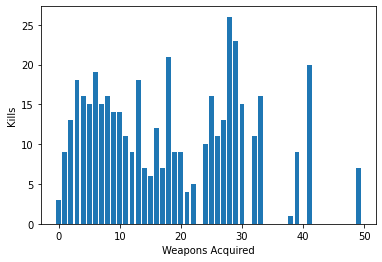

In [32]:
plt.bar(df['weaponsAcquired'],df['kills'])
plt.xlabel('Weapons Acquired')
plt.ylabel('Kills')

The above bar graphs shows the relation between weapons acquired and no of kills done,we can conclude that we dont need many weapons to get higher number of kills and it depends how you utilize the weapons

In [36]:
print("The average person kills",df['kills'].mean(),"Enemies")
print("50% of people have",df['kills'].quantile(0.50),'kills or less')
print("75% of people have",df['kills'].quantile(0.75),'kills or less')
print("99% of people have ",df['kills'].quantile(0.99),'Kills or less')
print("maximum kills",df['kills'].max())

The average person kills 0.9274197200960188 Enemies
50% of people have 0.0 kills or less
75% of people have 1.0 kills or less
99% of people have  7.0 Kills or less
maximum kills 26.0


Text(0.5, 1.0, 'ride distance vs win points')

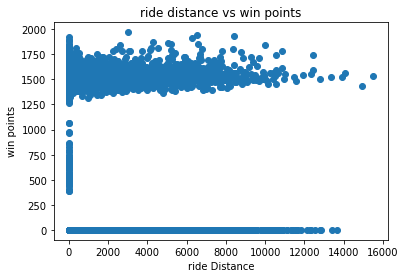

In [28]:
plt.scatter(df["rideDistance"],df['winPoints'])
plt.xlabel('ride Distance')
plt.ylabel('win points')
plt.title('ride distance vs win points')

In [25]:
### The above graph shows as the distance increases in x axis the winning points are decreased, Hence if you ride more in pubg game you are definitely following a bad strategy


Text(0.5, 1.0, 'swim distance vs win points')

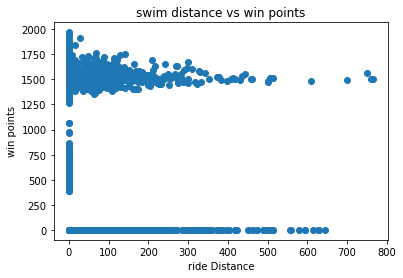

In [26]:
plt.scatter(df["swimDistance"],df['winPoints'])
plt.xlabel('swim Distance')
plt.ylabel('win points')
plt.title('swim distance vs win points')

The above graphs shows if you choose to swim more you are not going to get wining points

In [ ]:
df.head()

The above graph shows the number of players kills varies from 0 to 8+

ValueError: ignored

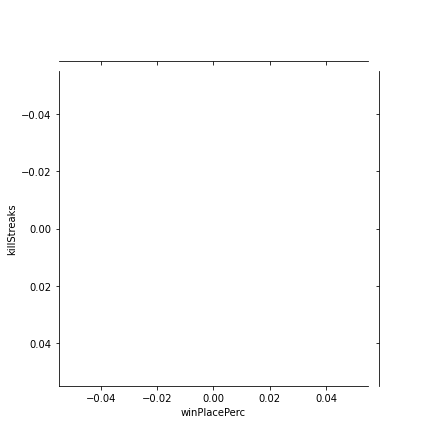

In [57]:
sns.jointplot(x='winPlacePerc',y='killStreaks',data=df,kind='scatter')